## 1. Importing Libraries & Loading Dataset

In [45]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
#import plot.graph_objs as go
#import plot.offline as py

In [38]:
df = pd.read_csv('data/heart-disease.csv')
data = df.copy()
df.head()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0


## 2. Data Preparation

### 2.1 Data Description

In [29]:
# Convert int feature
int_features = ['Age','Gender','Chest pain type','Resting blood pressure','Serum cholesterol',
                'Fasting blood sugar','Resting electrocardiographic','Maximum heart rate',
                'Exercise induced angina','ST segment','Number of major vessels','Thal']

for feature_name in int_features:
    data[feature_name] = pd.array(data[feature_name].values, dtype=pd.Int64Dtype())

In [30]:
#df = data

In [31]:
# First 5 rows
data.head()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
0,63,1,4,140,260,0,1,112,1,3.0,2,<NA>,<NA>,2
1,44,1,4,130,209,0,1,127,0,0.0,<NA>,<NA>,<NA>,0
2,60,1,4,132,218,0,1,140,1,1.5,3,<NA>,<NA>,2
3,55,1,4,142,228,0,1,149,1,2.5,1,<NA>,<NA>,1
4,66,1,3,110,213,1,2,99,1,1.3,2,<NA>,<NA>,0


In [32]:
print("\nGeneral info\n")
print(data.info())

print("\nStatistics (of numeric features)\n")
print(data.describe())

print("\nInfo about the class\n")
print(data['class'].describe(),"\n")
print(data['class'].value_counts())


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           920 non-null    Int64  
 1   Gender                        920 non-null    Int64  
 2   Chest pain type               920 non-null    Int64  
 3   Resting blood pressure        861 non-null    Int64  
 4   Serum cholesterol             890 non-null    Int64  
 5   Fasting blood sugar           830 non-null    Int64  
 6   Resting electrocardiographic  918 non-null    Int64  
 7   Maximum heart rate            865 non-null    Int64  
 8   Exercise induced angina       865 non-null    Int64  
 9   ST depression                 858 non-null    float64
 10  ST segment                    611 non-null    Int64  
 11  Number of major vessels       309 non-null    Int64  
 12  Thal                          434 non-null    Int

### 2.2 Unique & Missing values

In [33]:
data.nunique()

Age                              50
Gender                            2
Chest pain type                   4
Resting blood pressure           61
Serum cholesterol               217
Fasting blood sugar               2
Resting electrocardiographic      3
Maximum heart rate              119
Exercise induced angina           2
ST depression                    53
ST segment                        3
Number of major vessels           4
Thal                              3
class                             5
dtype: int64

In [34]:
data.isnull().sum()

Age                               0
Gender                            0
Chest pain type                   0
Resting blood pressure           59
Serum cholesterol                30
Fasting blood sugar              90
Resting electrocardiographic      2
Maximum heart rate               55
Exercise induced angina          55
ST depression                    62
ST segment                      309
Number of major vessels         611
Thal                            486
class                             0
dtype: int64

from math import isnan

data = data.drop("F", axis=1)
dropped_data = {}

for column in data.columns:
    dropped_data.update({column : 0})
    for value in raw_data[column]:
        if isnan(value):
            dropped_data[column] += 1
        else:
            continue

## 3. Exploratory Data Analysis (EDA)

### 3.1 Dependant (target) variable - class

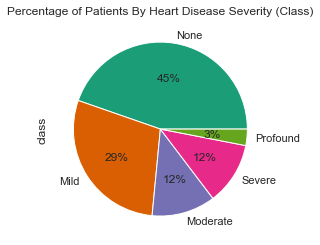

In [35]:
def disease_pct(data):
    """
    Make a pie chart of 'class' values
    Class: 0 = None, 1 = Mild, 2 = Moderate, 3 = Severe, 4 = Profound
    """
    
    labels = ['None', 'Mild', 'Moderate', 'Severe', 'Profound']
    colors = sns.color_palette('Dark2')
    class_breakdown = data['class'].value_counts().plot(labels = labels, kind='pie', title='Percentage of Patients By Heart Disease Severity (Class)', autopct='%0.f%%', colors=colors)
    
disease_pct(data)    

#### Class Imbalance

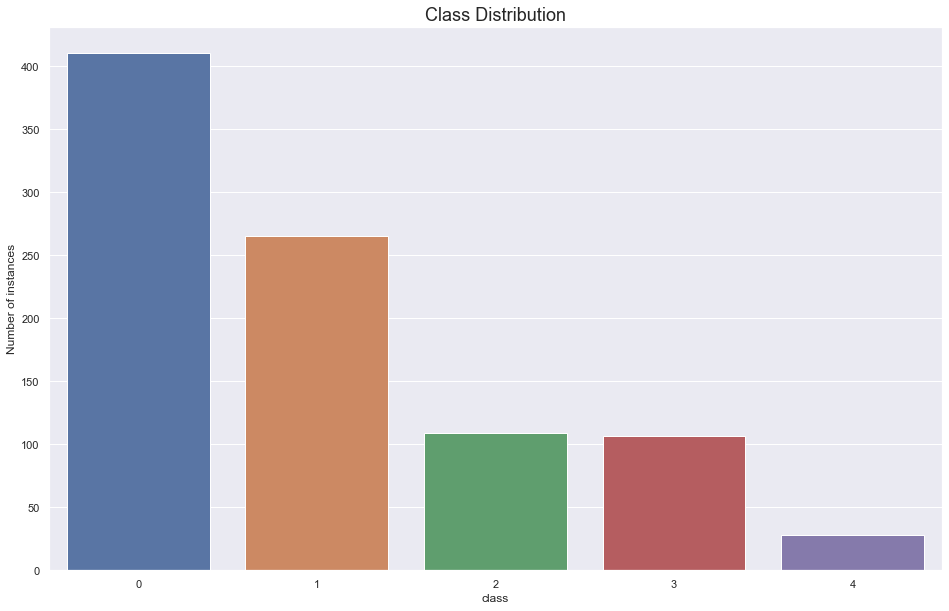

In [46]:
def class_balance(data):
    """
    Make a bar chart of 'class' distributions
    Class: 0 = None, 1 = Mild, 2 = Moderate, 3 = Severe, 4 = Profound
    """
    
    fig = plt.figure(figsize=(16, 10))
    sns.countplot(x=data['class'])
    plt.rc('font', size=18)
    plt.rc('axes', titlesize=18)
    plt.title('Class Distribution')
    plt.ylabel('Number of instances')
    plt.show()

class_balance(data)    

### 3.2 Feature variable - Gender

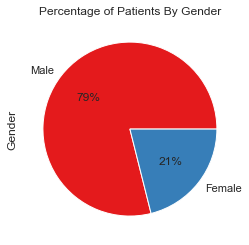

In [11]:
def gender_ratio(data):
    """
    Make a pie chart of 'Gender' values
    Sex: 0 = Female, 1 = Male
    """
    labels = ['Male', 'Female']
    colors = sns.color_palette('Set1')
    class_breakdown = data['Gender'].value_counts().plot(labels = labels, kind='pie', title='Percentage of Patients By Gender', autopct='%0.f%%', colors=colors)
 
gender_ratio(data)

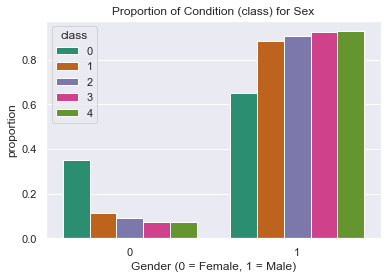

In [12]:
def condition_proportion_gender(data):
    """
    Plot a bar chart of the proportion of Conditon vs. gender.
    Show the percentage of each class for each gender.
    """
    labels = ['None', 'Mild', 'Moderate', 'Severe', 'Profound']
    
    data['Gender'].groupby(data['class']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Gender', y='proportion', hue='class', palette='Dark2');
    plt.title('Proportion of Condition (class) for Sex')
    plt.xlabel('Gender (0 = Female, 1 = Male)')
    plt.show()
    
condition_proportion_gender(data)    

### 3.3 Risk Factors in developing heart disease.

#### (i) Fasting Blood Sugar (mg/dl)

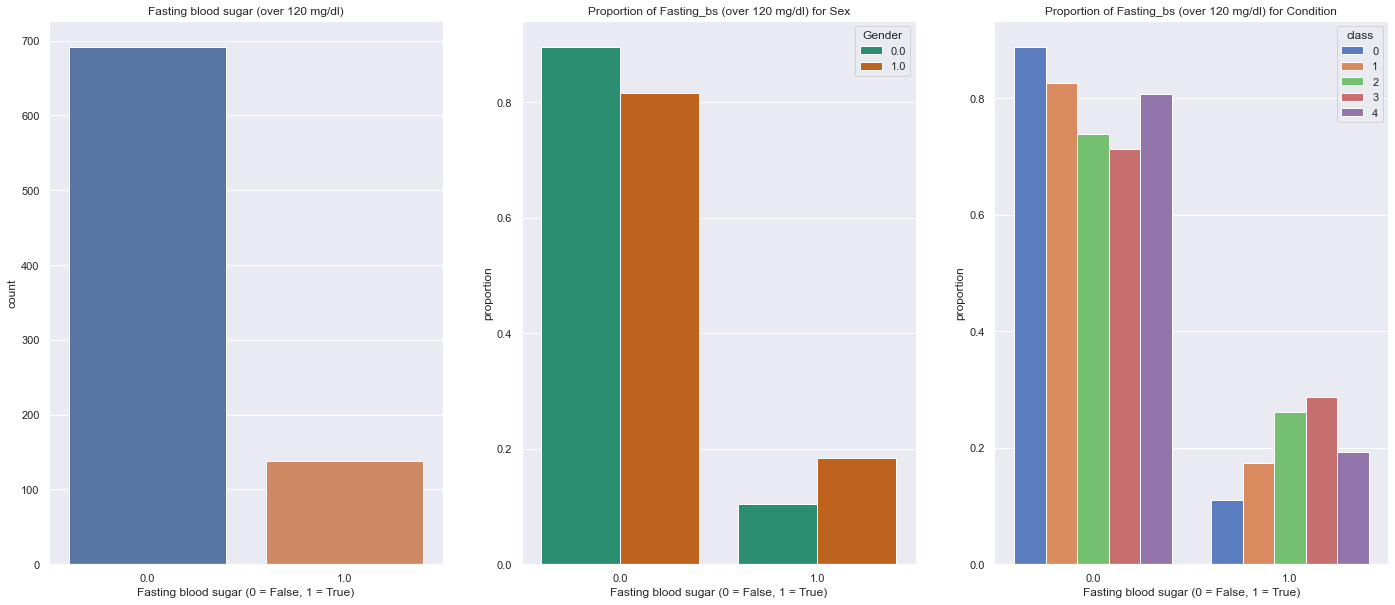

In [13]:

def risk_factors_fbs(data): 
    """
    fbs = fasting blood sugar
    Plot bar charts of fasting blood sugar (over 120 mg/dl) and compare for Sex and Condition
    """
    fig = plt.figure(figsize=(24, 10))
    
    # Fasting blood sugar > 120 mg/dl
    plt.subplot(1, 3, 1)
    sns.countplot(x=data['Fasting blood sugar'])
    plt.title('Fasting blood sugar (over 120 mg/dl)')
    plt.xlabel('Fasting blood sugar (0 = False, 1 = True)')
    
    
    # Fasting blood sugar for Gender
    plt.subplot(1, 3, 2)
    data['Fasting blood sugar'].groupby(data['Gender']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting blood sugar', y='proportion', hue='Gender', palette='Dark2')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Sex')
    plt.xlabel('Fasting blood sugar (0 = False, 1 = True)')
    
    
    # Fasting blood sugar for Condition (class)
    plt.subplot(1, 3, 3)
    data['Fasting blood sugar'].groupby(data['class']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Fasting blood sugar', y='proportion', hue='class', palette='muted')
    plt.title('Proportion of Fasting_bs (over 120 mg/dl) for Condition')
    plt.xlabel('Fasting blood sugar (0 = False, 1 = True)')
    plt.show()

    
risk_factors_fbs(df)

#### (ii), (iii) & (iv) Resting blood pressure (mm/Hg), Serum cholestrol (mg/dl) & Maximum heart rate (bpm)

C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

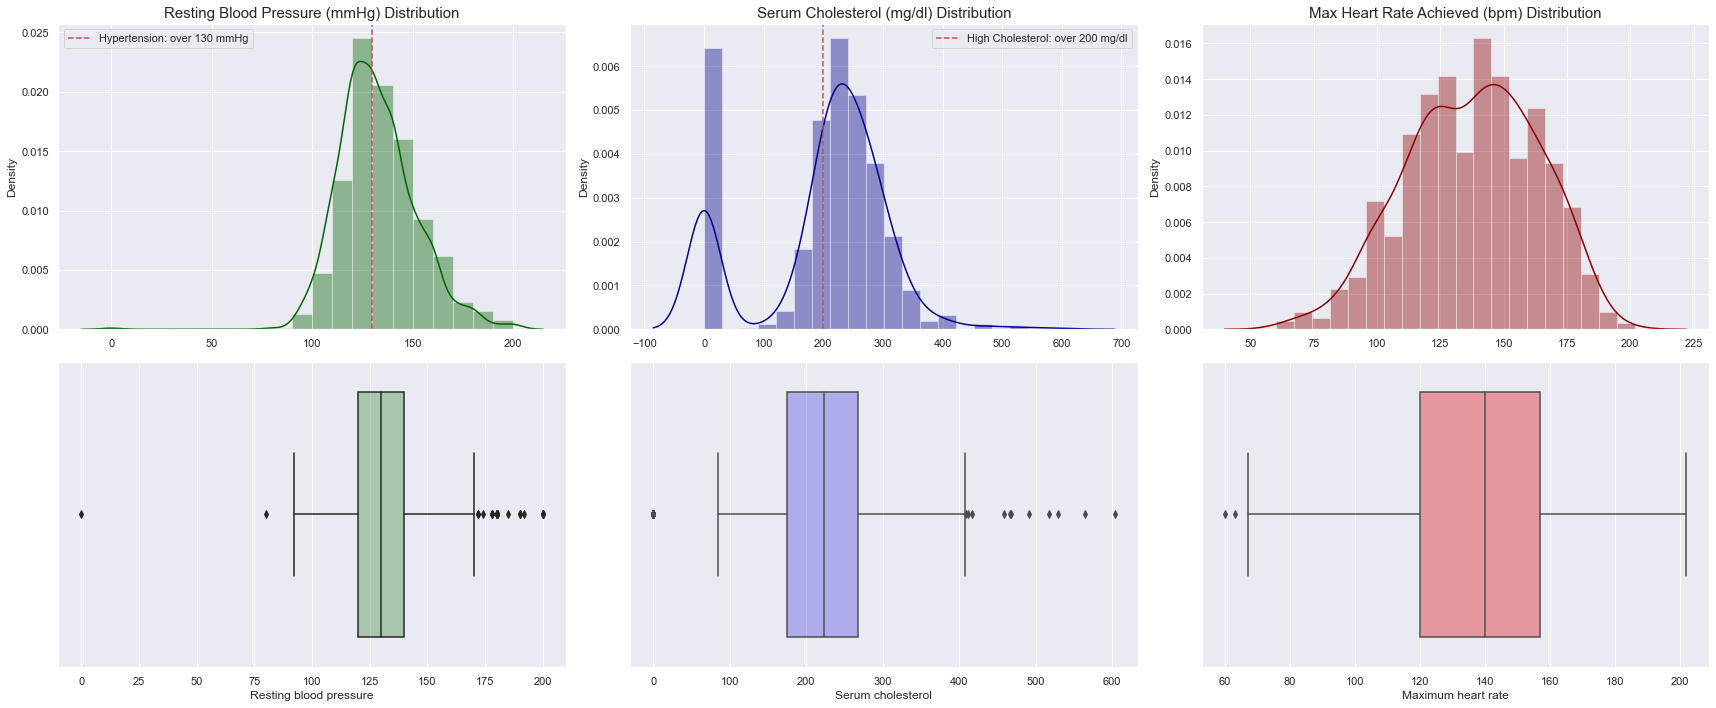

In [14]:
#sns.displot(data=data , x='Resting blood pressure', kde=True, color='darkgreen', bins=20)

def risk_factors_dist(data):
    """
    Show distributions of risk factors, Resting_BP, Chlesterol, and Max_HR.
    """
    fig = plt.figure(figsize=(24, 10))
    
    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.distplot(x=data['Resting blood pressure'].dropna(), color='darkgreen',bins=20)
    #sns.displot(data=df , x='Resting blood pressure', kde=True, color='darkgreen', bins=20)
    plt.title('Resting Blood Pressure (mmHg) Distribution', fontsize=15)
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()
    
    plt.subplot(2, 3, 4)
    ax = sns.boxplot(x=data['Resting blood pressure'], orient='h',color='green')   
       
    for patch in ax.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))    
        
        
    # Serum cholesterol 
    plt.subplot(2, 3, 2)
    sns.distplot(x=data['Serum cholesterol'].dropna(), color='darkblue', bins=20)
    # sns.displot(df['Serum cholesterol'].dropna(), kde=True, color='darkred',bins=20)
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()
    
    plt.subplot(2, 3, 5)
    ax = sns.boxplot(x=data['Serum cholesterol'], orient='h', color='blue')
  
    for patch in ax.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .3))

    
    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.distplot(x=data['Maximum heart rate'].dropna(), color='darkred', bins=20)
    # sns.displot(df['Maximum heart rate'].dropna(), kde=True, color='darkred',bins=20)
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)
    
    plt.subplot(2, 3, 6)
    ax = sns.boxplot(x=data['Maximum heart rate'], orient='h', color='red')

    for patch in ax.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .4))
    
    plt.tight_layout()
    plt.show()
    
    
risk_factors_dist(df);

#### (v) Distribution of risk (Resting blood pressure, Serum cholesterol, Maximum heart rate) by gender

C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

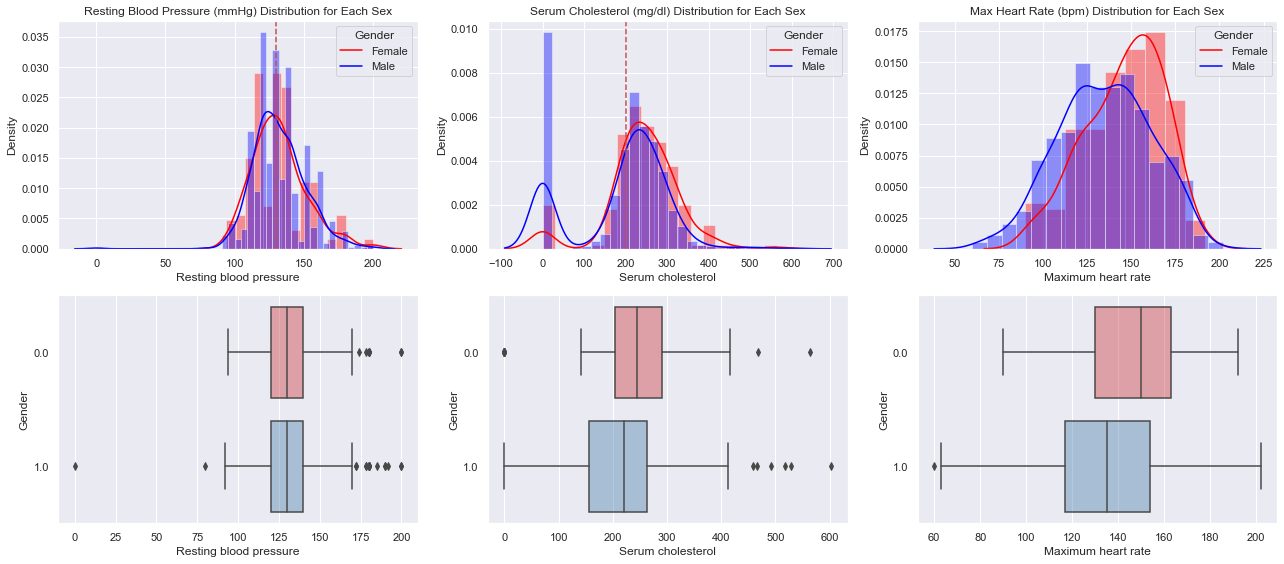

In [15]:
def risk_factors_dist_gender(data):
    """
    Show distributions of risk factors for each gender
    """
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure for each sex
    plt.subplot(2, 3, 1)
    rest_BP_female = data[data['Gender']==0]['Resting blood pressure']
    rest_BP_male = data[data['Gender']==1]['Resting blood pressure']
    sns.distplot(rest_BP_female, color='Red')   
    sns.distplot(rest_BP_male, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Each Sex')
    plt.gca().legend(title='Gender', labels=['Female','Male'])
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    
    plt.subplot(2, 3, 4)
    ax = sns.boxplot(x=data['Resting blood pressure'], y=data['Gender'], 
                palette='Set1', orient='h')
    
    # Transparancy of boxplot
    for patch in ax.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .4))
    
    
    # Serum cholesterol distribution for each sex
    plt.subplot(2, 3, 2)
    chol_female = data[data['Gender']==0]['Serum cholesterol']
    chol_male = data[data['Gender']==1]['Serum cholesterol']
    sns.distplot(chol_female, color='Red')   
    sns.distplot(chol_male, color='Blue')
    plt.title('Serum Cholesterol (mg/dl) Distribution for Each Sex')
    plt.gca().legend(title='Gender', labels=['Female','Male'])
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    
    plt.subplot(2, 3, 5)
    ax = sns.boxplot(x=data['Serum cholesterol'], y=data['Gender'], 
                palette='Set1', orient='h')
    
    # Transparancy of boxplot
    for patch in ax.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .4))
    
    
    # Max heart rate distribution for each sex 
    plt.subplot(2, 3, 3)
    max_HR_female = data[data['Gender']==0]['Maximum heart rate']
    max_HR_male = data[data['Gender']==1]['Maximum heart rate']
    sns.distplot(max_HR_female, color='Red')   
    sns.distplot(max_HR_male, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Each Sex')
    plt.gca().legend(title='Gender', labels=['Female','Male'])
    
    plt.subplot(2, 3, 6)
    ax = sns.boxplot(x=data['Maximum heart rate'], y=data['Gender'], 
                palette='Set1', orient='h')
    
    # Transparancy of boxplot
    for patch in ax.artists:
         r, g, b, a = patch.get_facecolor()
         patch.set_facecolor((r, g, b, .4))
    
    plt.tight_layout()
    plt.show()
    
    
risk_factors_dist_gender(df);

#### (vi) Resting blood pressure, Serum cholesterol, Maximum heart rate by. (class)

C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

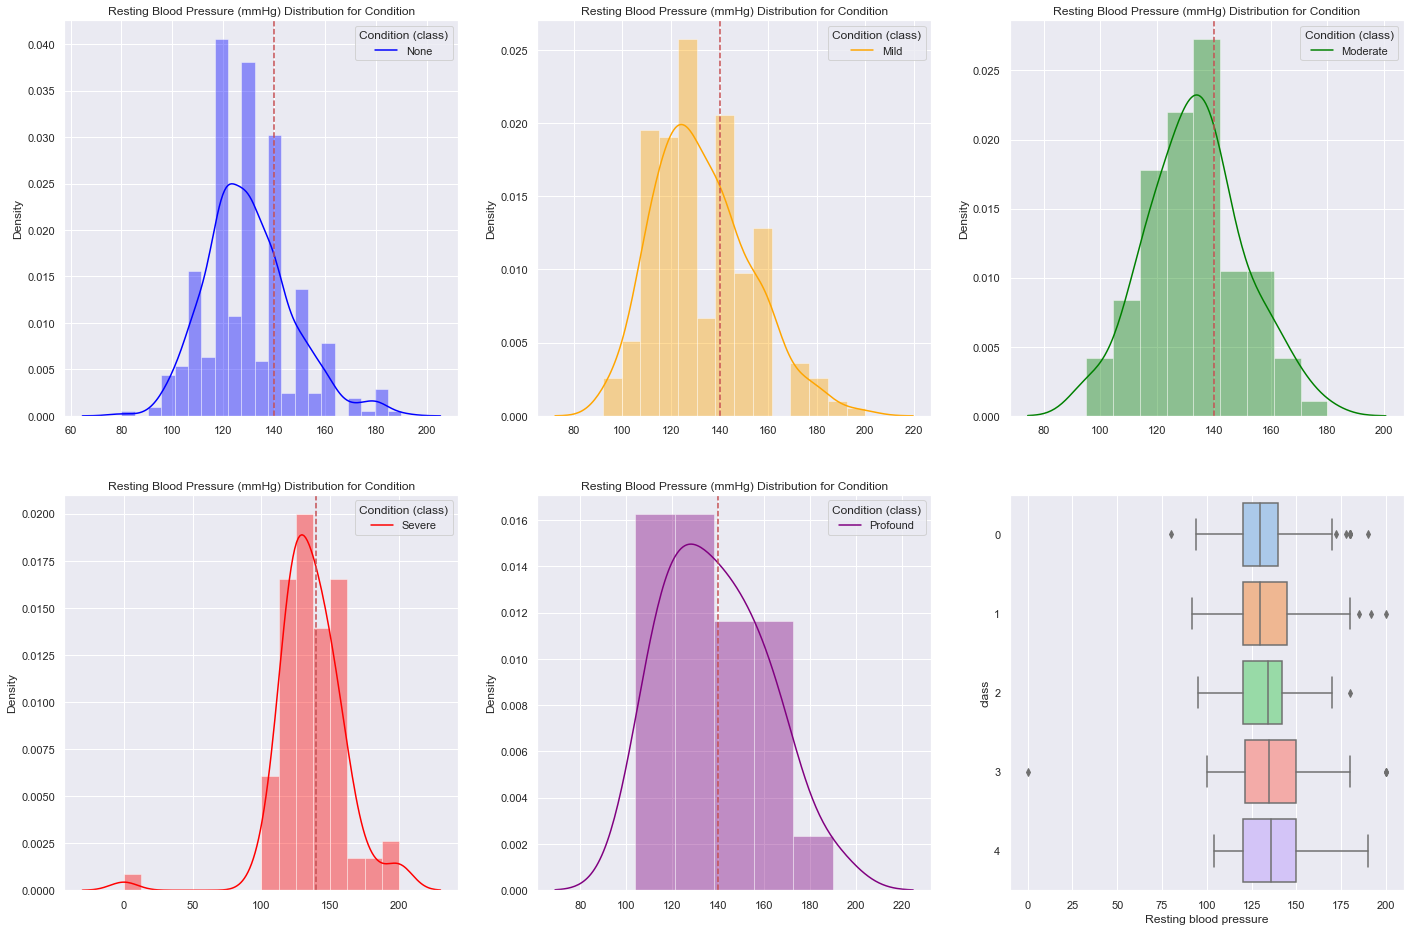

In [16]:
def blood_pressure_condition(data):
    """
    Show distributions of risk factors for each condition
    """
    fig = plt.figure(figsize=(24, 16))
    
    # Resting blood pressure distribution for each condition
    # plt.subplot(2, 3, 1)
    rest_BP_0 = data[data['class']==0]['Resting blood pressure']
    rest_BP_1 = data[data['class']==1]['Resting blood pressure']
    rest_BP_2 = data[data['class']==2]['Resting blood pressure']
    rest_BP_3 = data[data['class']==3]['Resting blood pressure']
    rest_BP_4 = data[data['class']==4]['Resting blood pressure']
    
    plt.subplot(2, 3, 1)
    sns.distplot(x=rest_BP_0, color='Blue')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['None'])  
    plt.axvline(x=140, color='r', linestyle='--', label='Hypertension: over 140 mmHg')
             
    plt.subplot(2, 3, 2)
    sns.distplot(x=rest_BP_1, color='Orange')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Mild'])  
    plt.axvline(x=140, color='r', linestyle='--', label='Hypertension: over 140 mmHg')             
                
    plt.subplot(2, 3, 3)
    sns.distplot(x=rest_BP_2, color='Green')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Moderate'])  
    plt.axvline(x=140, color='r', linestyle='--', label='Hypertension: over 140 mmHg')            
                
    plt.subplot(2, 3, 4)
    sns.distplot(x=rest_BP_3, color='Red')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Severe'])  
    plt.axvline(x=140, color='r', linestyle='--', label='Hypertension: over 140 mmHg')            
                
    plt.subplot(2, 3, 5)
    sns.distplot(x=rest_BP_4, color='Purple')
    plt.title('Resting Blood Pressure (mmHg) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Profound'])  
    plt.axvline(x=140, color='r', linestyle='--', label='Hypertension: over 140 mmHg')
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Resting blood pressure'], y=data['class'], 
                orient='h', palette='pastel')
    
blood_pressure_condition(df)

C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

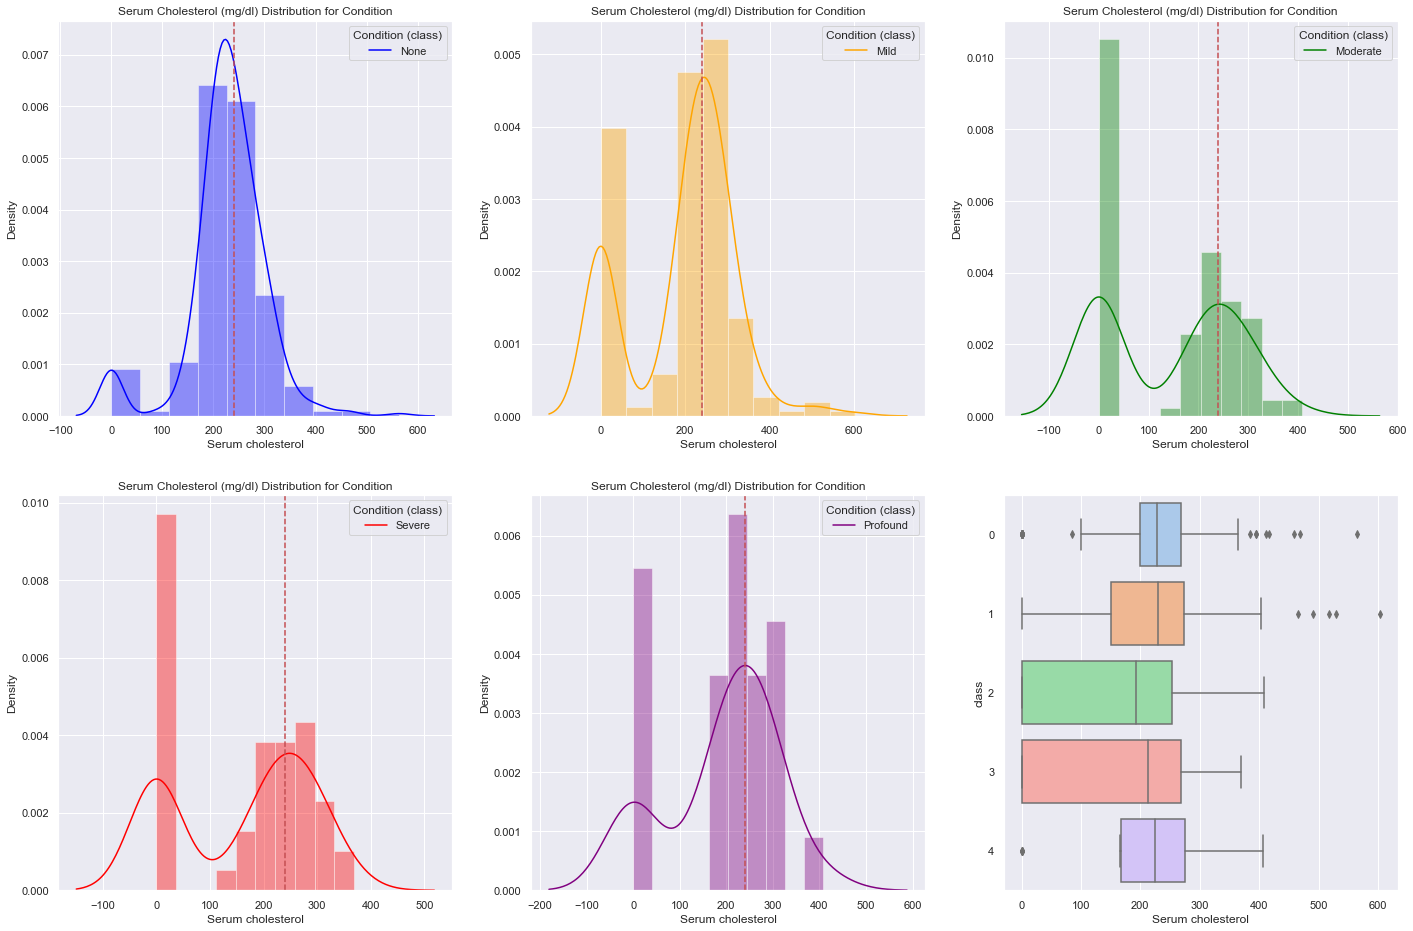

In [17]:
def serum_chol_condition(data):
    
    fig = plt.figure(figsize=(24, 16))
    
    # Serum cholesterol distribution for each condition
    chol_0 = data[data['class']==0]['Serum cholesterol']
    chol_1 = data[data['class']==1]['Serum cholesterol']
    chol_2 = data[data['class']==2]['Serum cholesterol']
    chol_3 = data[data['class']==3]['Serum cholesterol']
    chol_4 = data[data['class']==4]['Serum cholesterol']
    
    plt.subplot(2, 3, 1)
    sns.distplot(chol_0, color='Blue', bins=10)
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['None'])
    plt.axvline(x=240, color='r', linestyle='--', label='High Cholesterol: over 240 mg/dl')            
                
    plt.subplot(2, 3, 2)
    sns.distplot(chol_1, color='Orange', bins=10)
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Mild'])
    plt.axvline(x=240, color='r', linestyle='--', label='High Cholesterol: over 240 mg/dl')
                
    plt.subplot(2, 3, 3)
    sns.distplot(chol_2, color='Green', bins=10)
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Moderate'])
    plt.axvline(x=240, color='r', linestyle='--', label='High Cholesterol: over 240 mg/dl')            
                
    plt.subplot(2, 3, 4)
    sns.distplot(chol_3, color='Red', bins=10)            
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Severe'])
    plt.axvline(x=240, color='r', linestyle='--', label='High Cholesterol: over 240 mg/dl')
                
    plt.subplot(2, 3, 5)
    sns.distplot(chol_4, color='Purple', bins=10)
    plt.title('Serum Cholesterol (mg/dl) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Profound'])
    plt.axvline(x=240, color='r', linestyle='--', label='High Cholesterol: over 240 mg/dl')

    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Serum cholesterol'], y=data['class'],
                orient='h', palette='pastel')
    
serum_chol_condition(df)

C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

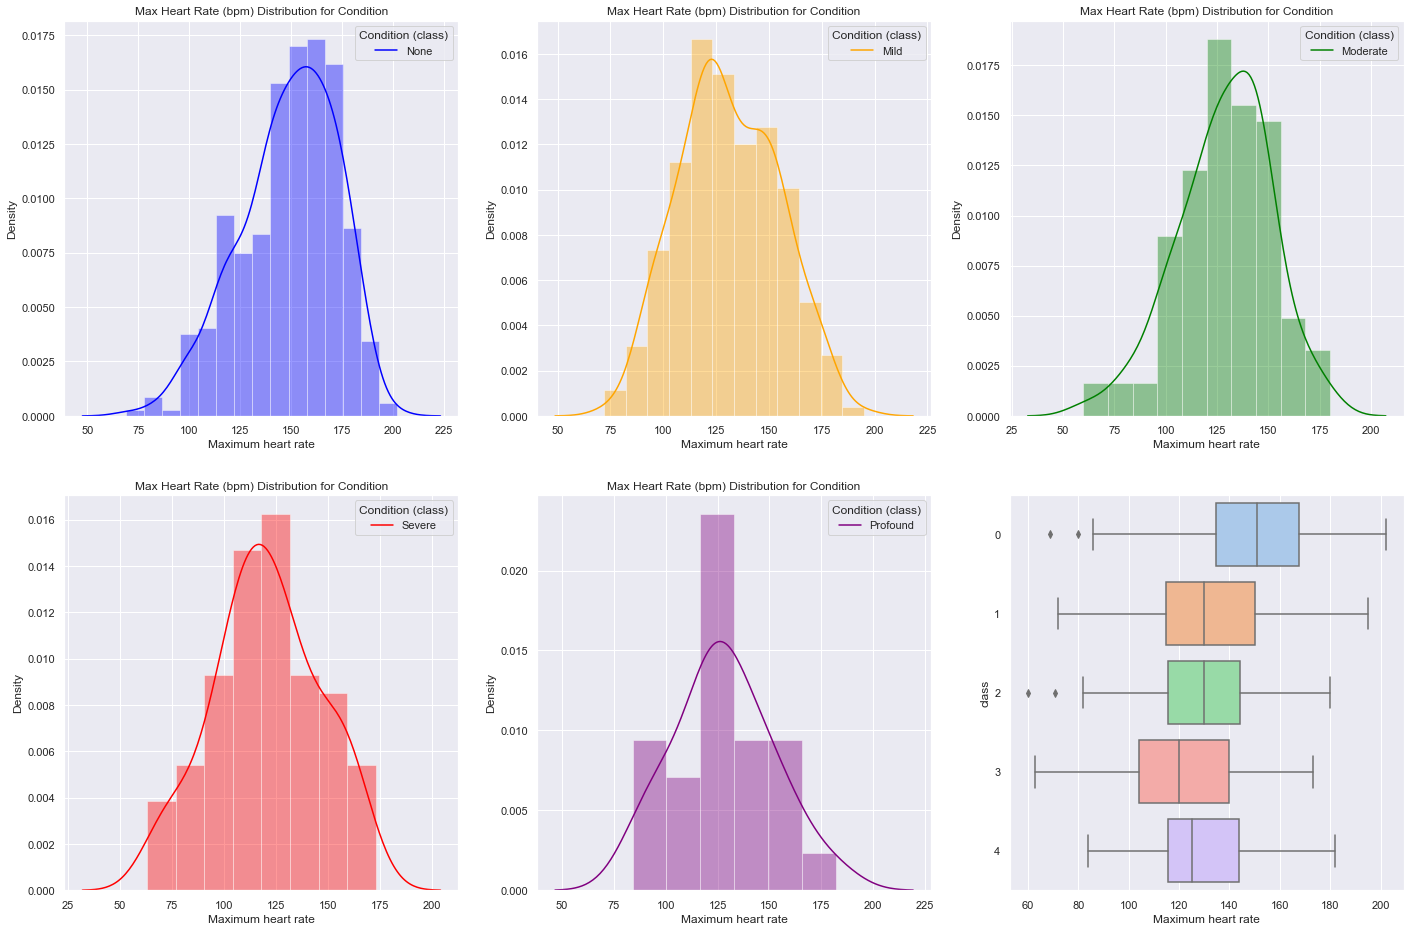

In [18]:
def max_heart_rate_conditon(data):
    
    fig = plt.figure(figsize=(24, 16))
    
    # Max heart rate achieved distribution for each condition
    max_HR_0 = data[data['class']==0]['Maximum heart rate']
    max_HR_1 = data[data['class']==1]['Maximum heart rate']
    max_HR_2 = data[data['class']==2]['Maximum heart rate']
    max_HR_3 = data[data['class']==3]['Maximum heart rate']
    max_HR_4 = data[data['class']==4]['Maximum heart rate']
                
    plt.subplot(2, 3, 1)
    sns.distplot(max_HR_0, color='Blue')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['None'])            
                
    plt.subplot(2, 3, 2)
    sns.distplot(max_HR_1, color='Orange')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Mild'])            
                
    plt.subplot(2, 3, 3)
    sns.distplot(max_HR_2, color='Green')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Moderate'])                
                
    plt.subplot(2, 3, 4)
    sns.distplot(max_HR_3, color='Red')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Severe'])            
                
    plt.subplot(2, 3, 5)
    sns.distplot(max_HR_4, color='Purple')
    plt.title('Max Heart Rate (bpm) Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Profound'])
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Maximum heart rate'], y=data['class'],
                orient='h', palette='pastel')
    
max_heart_rate_conditon(df)

### 3.4 Symptoms of Heart Disease

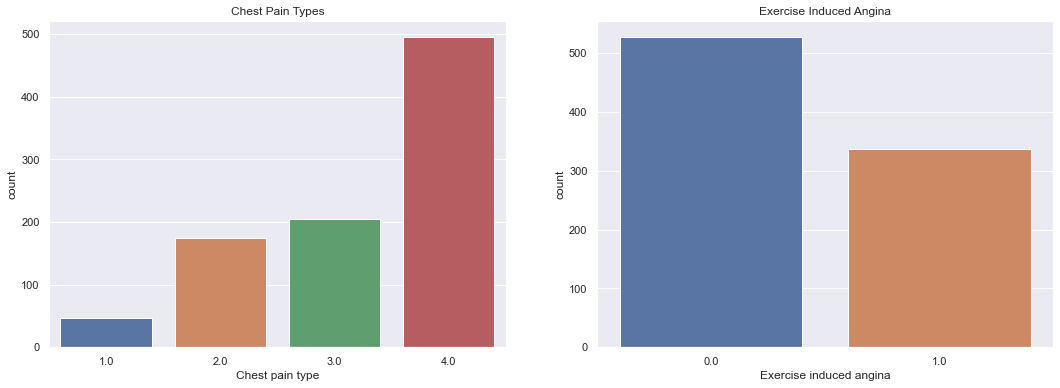

In [19]:
def symptoms_features(data):
    """
    Count the number of Chest_pain_type and Exercise_induced_angina values.
    """
    plt.figure(figsize=(18, 6))
    
    # Chest pain types
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest pain type', data=data)
    plt.title('Chest Pain Types')

    
    # Exercise induced angina
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise induced angina', data=data)
    plt.title('Exercise Induced Angina')

symptoms_features(df);

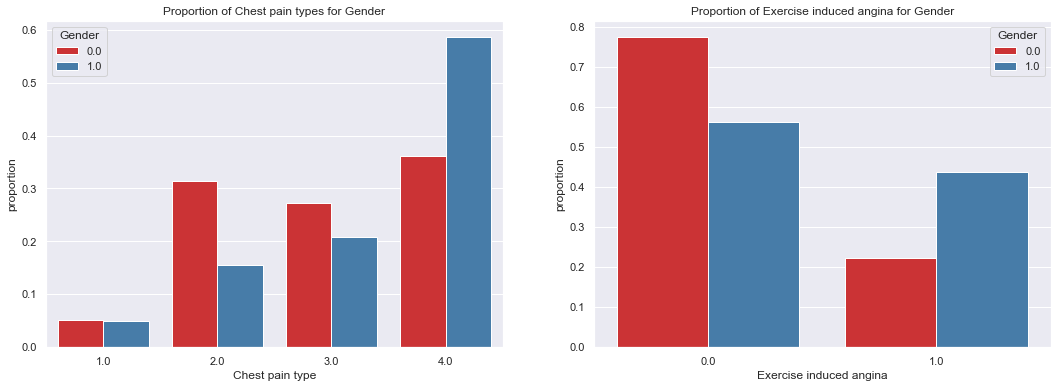

In [20]:
def symptoms_features_sex(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Sex.
    """
    fig = plt.figure(figsize=(18, 6))
    
    # Chest pain types for Gender 
    plt.subplot(1, 2, 1)
    data['Chest pain type'].groupby(data['Gender']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest pain type', y='proportion', hue='Gender', palette='Set1')
    plt.title('Proportion of Chest pain types for Gender')
    
    
    # Exercise induced angina for Gender
    plt.subplot(1, 2, 2)
    data['Exercise induced angina'].groupby(data['Gender']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise induced angina', y='proportion', hue='Gender', palette='Set1')
    plt.title('Proportion of Exercise induced angina for Gender')
    plt.show()
    
    
symptoms_features_sex(df);

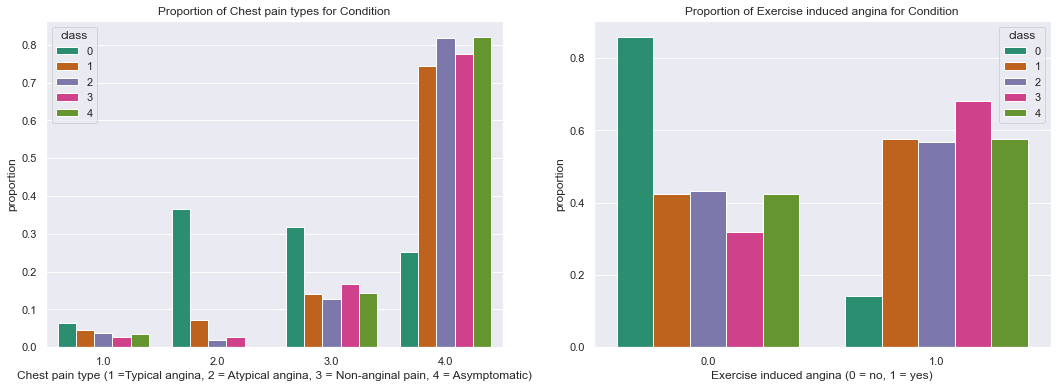

In [21]:
def symptoms_features_condition(data):
    """
    Plot bar charts of chest pain type and exercise induced angina for Condition (class).
    """
    fig = plt.figure(figsize=(18, 6))
    
    # Chest pain types for class 
    plt.subplot(1, 2, 1)
    data['Chest pain type'].groupby(data['class']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Chest pain type', y='proportion', hue='class', palette='Dark2')
    plt.title('Proportion of Chest pain types for Condition')
    plt.xlabel('Chest pain type (1 =Typical angina, 2 = Atypical angina, 3 = Non-anginal pain, 4 = Asymptomatic)')
    
    # Exercise induced angina for class
    plt.subplot(1, 2, 2)
    data['Exercise induced angina'].groupby(data['class']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Exercise induced angina', y='proportion', hue='class', palette='Dark2')
    plt.title('Proportion of Exercise induced angina for Condition')
    plt.xlabel('Exercise induced angina (0 = no, 1 = yes)')
    plt.show()
    
    
symptoms_features_condition(df);

### 3.5 Heart Functions for Heart Disease

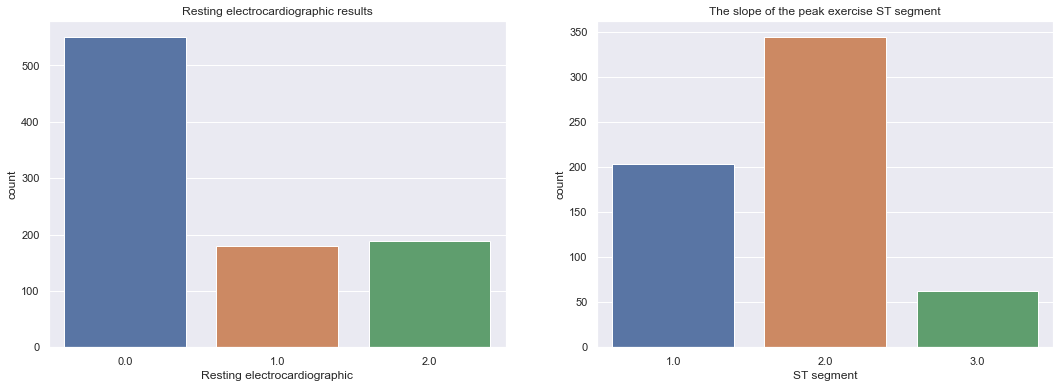

In [22]:
def heart_functions(data):
    """
    Make a bar chart of Resting electrocardiographic and ST_segment (slope).
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting electrocardiographic', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST segment', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()
    

heart_functions(df);

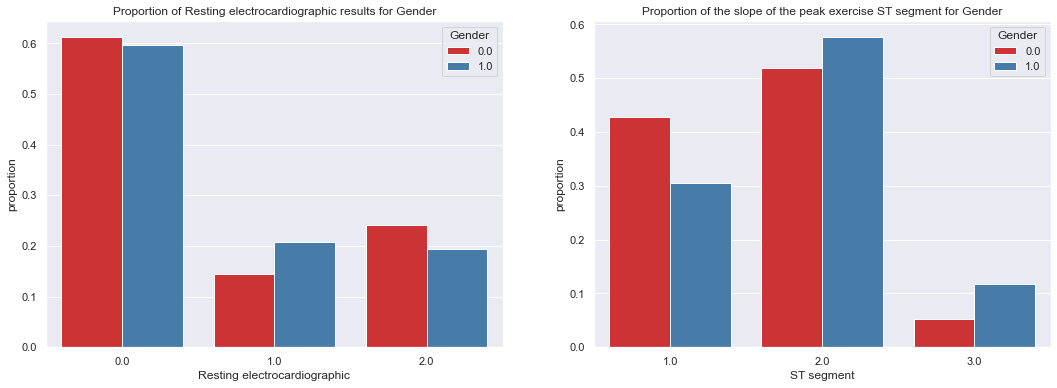

In [23]:
def heart_functions_sex(data):
    """
    Plot the proportion of Resting_exc and ST segment for Gender.
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting electrocardiographic'].groupby(data['Gender']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting electrocardiographic', y='proportion', hue='Gender', palette='Set1')
    plt.title('Proportion of Resting electrocardiographic results for Gender')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST segment'].groupby(data['Gender']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST segment', y='proportion', hue='Gender', palette='Set1')
    plt.title('Proportion of the slope of the peak exercise ST segment for Gender')
    plt.show()
    

heart_functions_sex(df);

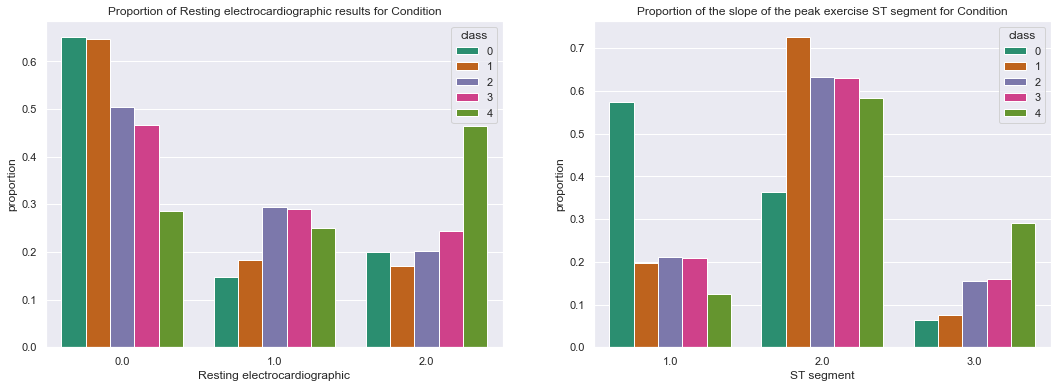

In [24]:
def heart_functions_condition(data):
    """
    Plot the proportion of Resting electrocardiographic and ST segment(slope) for Condition (class).
    """
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    data['Resting electrocardiographic'].groupby(data['class']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Resting electrocardiographic', y='proportion', hue='class', palette='Dark2')
    plt.title('Proportion of Resting electrocardiographic results for Condition')

    
    # ST_slope
    plt.subplot(1, 2, 2)
    data['ST segment'].groupby(data['class']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='ST segment', y='proportion', hue='class', palette='Dark2')
    plt.title('Proportion of the slope of the peak exercise ST segment for Condition')
    plt.show()
    

heart_functions_condition(df);

C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

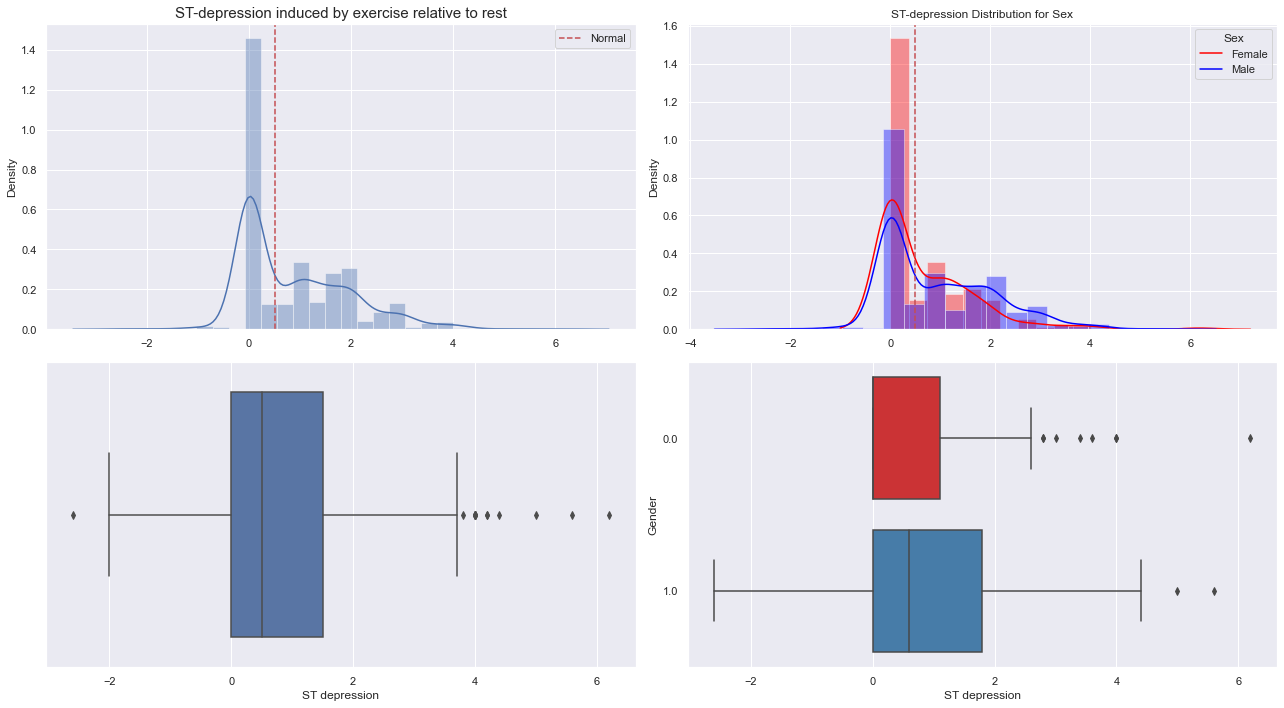

In [25]:
def heart_functions_sex(data):
    """
    Make a standard distribution of ST depression and distributions for Gender and Condition(class).
    """    
    fig = plt.figure(figsize=(18, 10))

    # ST-depression induced by exercise relative to rest
    plt.subplot(2, 2, 1)
    sns.distplot(x=data['ST depression'])
    plt.title('ST-depression induced by exercise relative to rest', fontsize=15)
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    sns.boxplot(x=data['ST depression'], orient='h') 
     
    
    # ST-depression for Gender
    plt.subplot(2, 2, 2)
    chol_female = data[data['Gender']==0]['ST depression']
    chol_male = data[data['Gender']==1]['ST depression']
    sns.distplot(x=chol_female, color='Red')   
    sns.distplot(x=chol_male, color='Blue')
    plt.title('ST-depression Distribution for Sex')
    plt.gca().legend(title='Sex', labels=['Female','Male'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    
    plt.subplot(2, 2, 4)
    sns.boxplot(x=data['ST depression'], y=data['Gender'], 
                palette='Set1', orient='h')
    
    plt.tight_layout()
    plt.show()
    
    
heart_functions_sex(df)

C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

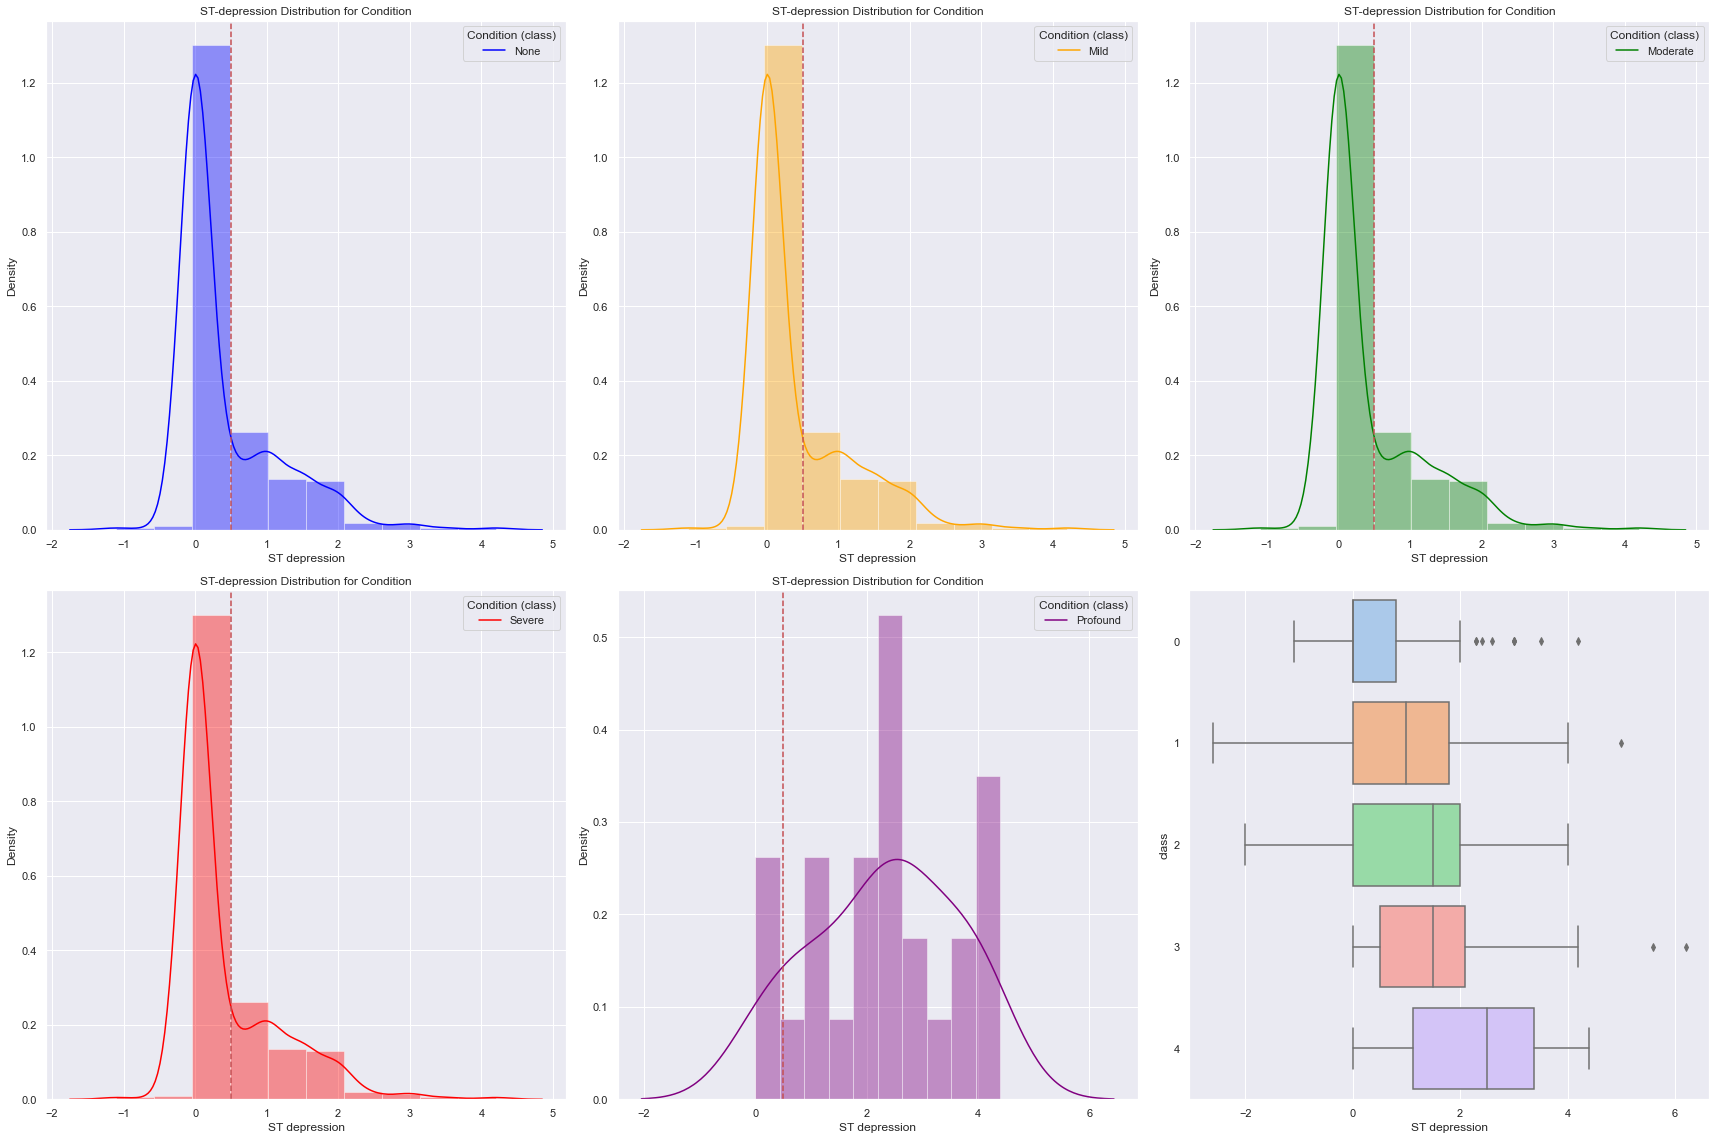

In [26]:
def heart_functions_class(data):

    fig = plt.figure(figsize=(24, 16))
    
    # ST-depression for Condition
    ST_dep_0 = data[data['class']==0]['ST depression']
    ST_dep_1 = data[data['class']==1]['ST depression']
    ST_dep_2 = data[data['class']==2]['ST depression']
    ST_dep_3 = data[data['class']==3]['ST depression']
    ST_dep_4 = data[data['class']==4]['ST depression']
    
    plt.subplot(2, 3, 1)
    sns.distplot(ST_dep_0, color='Blue', bins=10)
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['None'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    
    plt.subplot(2, 3, 2)
    sns.distplot(ST_dep_0, color='Orange', bins=10)
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Mild'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    
    
    plt.subplot(2, 3, 3)
    sns.distplot(ST_dep_0, color='Green', bins=10)
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Moderate'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    
    
    plt.subplot(2, 3, 4)
    sns.distplot(ST_dep_0, color='Red', bins=10)
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Severe'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    
    plt.subplot(2, 3, 5)
    sns.distplot(ST_dep_4, color='Purple', bins=10)
    plt.title('ST-depression Distribution for Condition')
    plt.gca().legend(title='Condition (class)', labels=['Profound'])
    plt.axvline(x=0.5, color='r', linestyle='--', label='Normal')
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['ST depression'], y=data['class'], 
                palette='pastel', orient='h')
    
    plt.tight_layout()
    plt.show()

heart_functions_class(df)

#### No of major vessels & thal

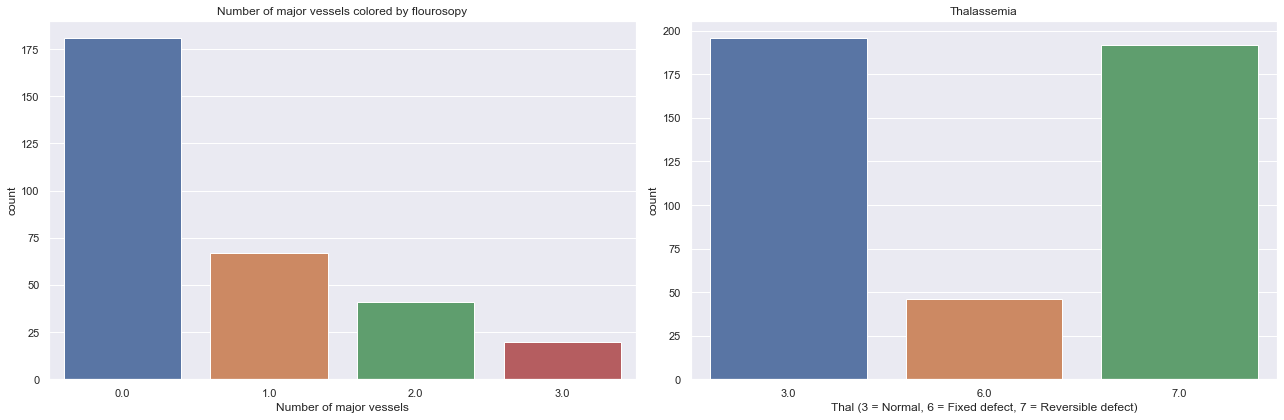

In [27]:
def heart_functions2(data):
    """
    EDA with numeric variables
    """
    fig = plt.figure(figsize=(18, 6))
    
    # Num_major_vessels
    plt.subplot(1, 2, 1)
    sns.countplot(x='Number of major vessels', data=data)
    plt.title('Number of major vessels colored by flourosopy')
    
    # Thallium
    plt.subplot(1, 2, 2)
    sns.countplot(x='Thal', data=data)
    plt.title('Thalassemia')
    plt.xlabel('Thal (3 = Normal, 6 = Fixed defect, 7 = Reversible defect)')
    plt.tight_layout()
    plt.show()
    
    
heart_functions2(df)

#### No of major vessels & thal by gender

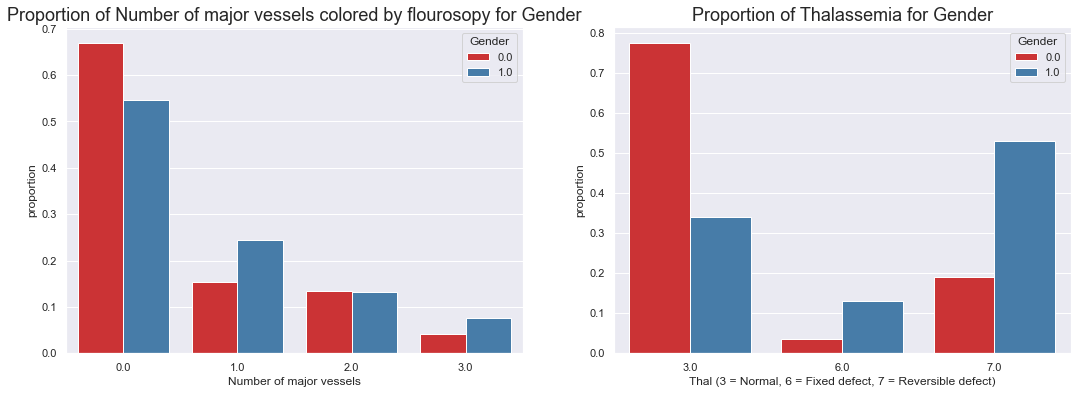

In [47]:
def heart_functions2_sex(data):
    """
    Plot proportions of Number of major vessels and Thalassemia for gender.
    """
    plt.figure(figsize=(18, 6))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Number of major vessels'].groupby(data['Gender']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Number of major vessels', y='proportion', hue='Gender', palette='Set1')
    plt.title('Proportion of Number of major vessels colored by flourosopy for Gender')

    # Thallium test
    plt.subplot(1, 2, 2)
    data['Thal'].groupby(data['Gender']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thal', y='proportion', hue='Gender', palette='Set1')
    plt.xlabel('Thal (3 = Normal, 6 = Fixed defect, 7 = Reversible defect)')
    plt.title('Proportion of Thalassemia for Gender')
    plt.show()
    

heart_functions2_sex(df);

#### No of major vessels & thal by class

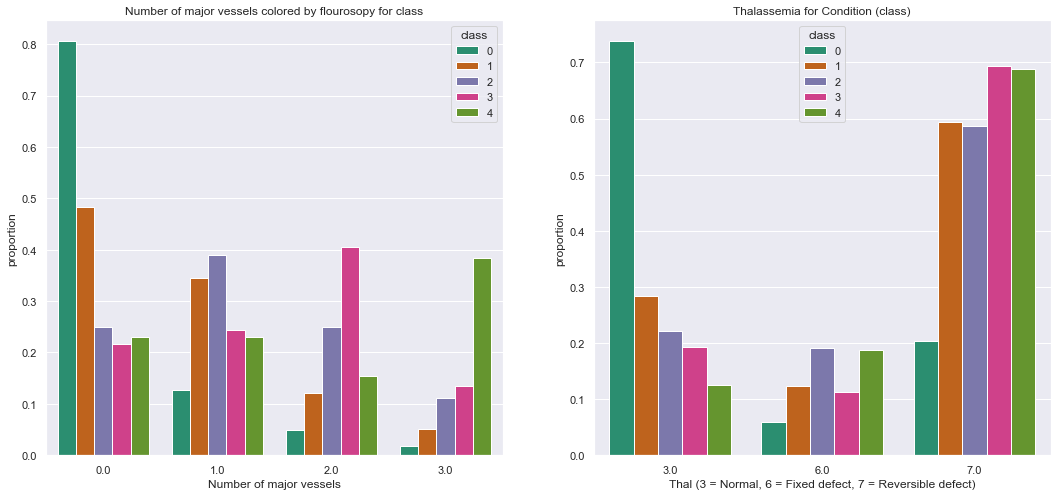

In [29]:
def heart_functions2_class(data):
    """
    Plot proportions of Number of major vessels and Thal for Condition(class).
    """
    plt.figure(figsize=(18, 8))

    # Num_major_vessels
    plt.subplot(1, 2, 1)
    data['Number of major vessels'].groupby(data['class']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Number of major vessels', y='proportion', hue='class', palette='Dark2')
    plt.title('Number of major vessels colored by flourosopy for class')

    # ST_slope
    plt.subplot(1, 2, 2)
    data['Thal'].groupby(data['class']).value_counts(normalize=True).rename('proportion').reset_index().pipe((sns.barplot, 'data'), x='Thal', y='proportion', hue='class', palette='Dark2')
    plt.xlabel('Thal (3 = Normal, 6 = Fixed defect, 7 = Reversible defect)')
    plt.title('Thalassemia for Condition (class)')
    plt.show()
    

heart_functions2_class(df);

### Feature Variable Age.

C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

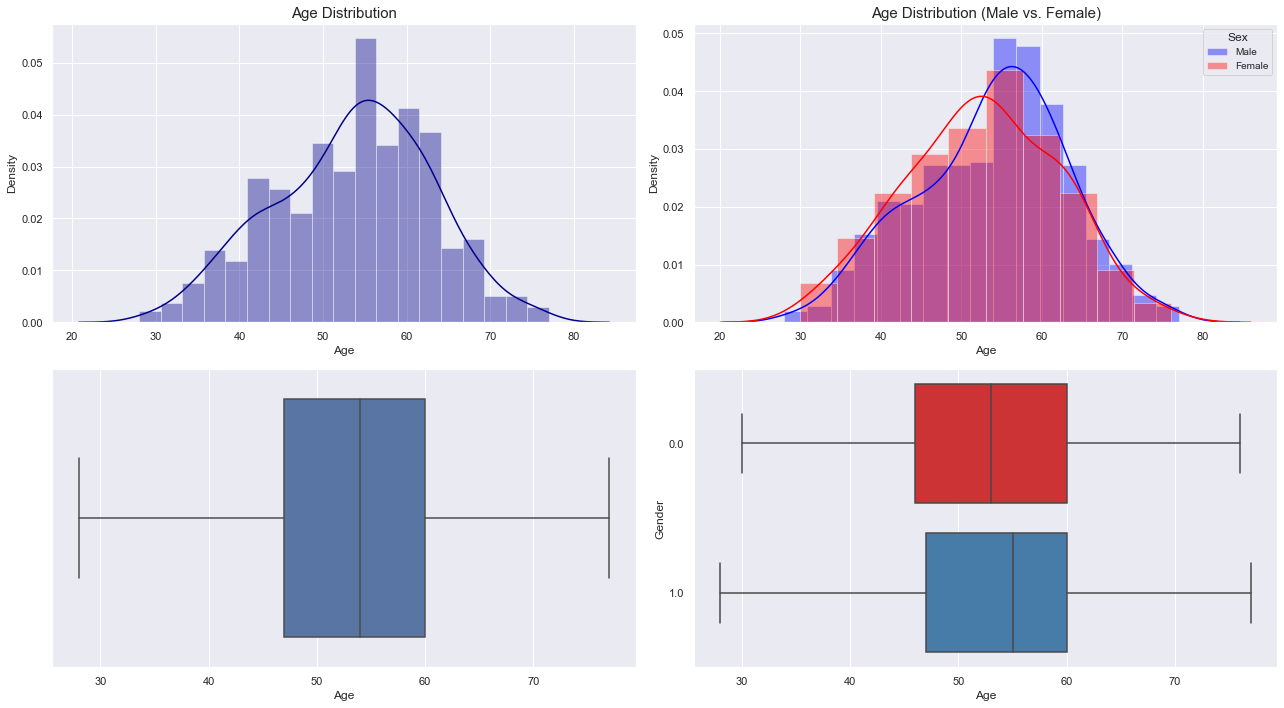

In [30]:
def age_distribution(data):
    """
    Make a standard distribution and distribution for Gender
    """
    fig = plt.figure(figsize=(18, 10))

    # Age distribution
    plt.subplot(2, 2, 1)
    sns.distplot(data['Age'], color='DarkBlue') 
    plt.title('Age Distribution', fontsize=15)

    plt.subplot(2, 2, 3)
    sns.boxplot(data['Age'], orient='h')
    

    # Age distribution for sex
    plt.subplot(2, 2, 2)
    female = data[data['Gender']==0]['Age']
    male = data[data['Gender']==1]['Age']
    sns.distplot(male, color='Blue', label='Male')
    sns.distplot(female, color='Red', label='Female')
    plt.title('Age Distribution (Male vs. Female)', fontsize=15)
    plt.legend(title='Sex', fontsize=10)

    plt.subplot(2, 2, 4)
    sns.boxplot(x=data['Age'], y=data['Gender'], orient='h', palette='Set1')
    
    plt.tight_layout()
    plt.show()

    
age_distribution(df)

C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\UniWork\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

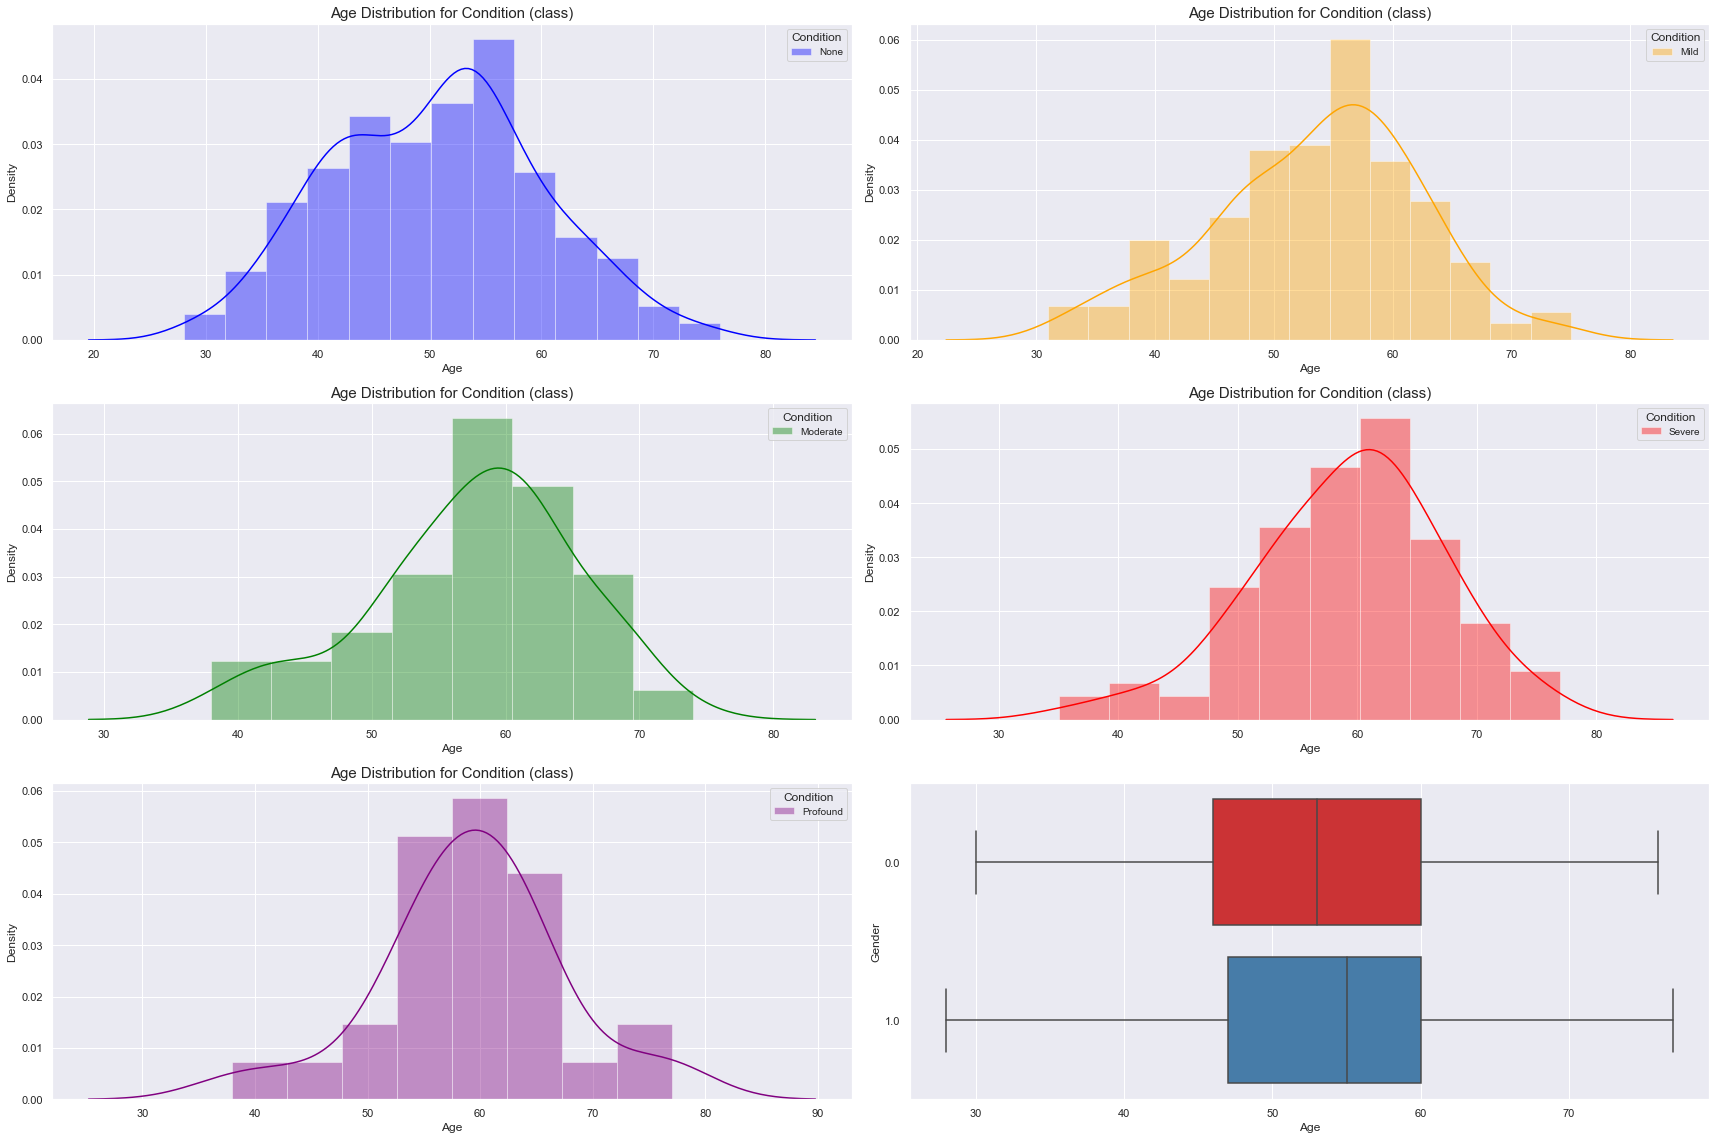

In [31]:
def age_distribution_class(data):   
    
    # Age distribution for Condition
    fig = plt.figure(figsize=(24, 16))
    
    none_age = data[data['class']==0]['Age']
    mild_age = data[data['class']==1]['Age']
    mod_age = data[data['class']==2]['Age']
    sev_age = data[data['class']==3]['Age']
    pro_age = data[data['class']==4]['Age']
    
    plt.subplot(3, 2, 1)
    sns.distplot(none_age, color='Blue', label='None')
    plt.title('Age Distribution for Condition (class)', fontsize=15)
    plt.legend(title='Condition', fontsize=10)
    
    plt.subplot(3, 2, 2)
    sns.distplot(mild_age, color='Orange', label='Mild')
    plt.title('Age Distribution for Condition (class)', fontsize=15)
    plt.legend(title='Condition', fontsize=10)
    
    plt.subplot(3, 2, 3)
    sns.distplot(mod_age, color='Green', label='Moderate')
    plt.title('Age Distribution for Condition (class)', fontsize=15)
    plt.legend(title='Condition', fontsize=10)
    
    plt.subplot(3, 2, 4)
    sns.distplot(sev_age, color='Red', label='Severe')
    plt.title('Age Distribution for Condition (class)', fontsize=15)
    plt.legend(title='Condition', fontsize=10)
    
    plt.subplot(3, 2, 5)
    sns.distplot(pro_age, color='Purple', label='Profound')
    plt.title('Age Distribution for Condition (class)', fontsize=15)
    plt.legend(title='Condition', fontsize=10)
    
    # Gender
    plt.subplot(3, 2, 6)
    sns.boxplot(x=data['Age'], y=data['Gender'], orient='h', palette='Set1')
    
    plt.tight_layout()
    plt.show()
    
age_distribution_class(df)

### Age vs. Multiple Features for Condition (class)

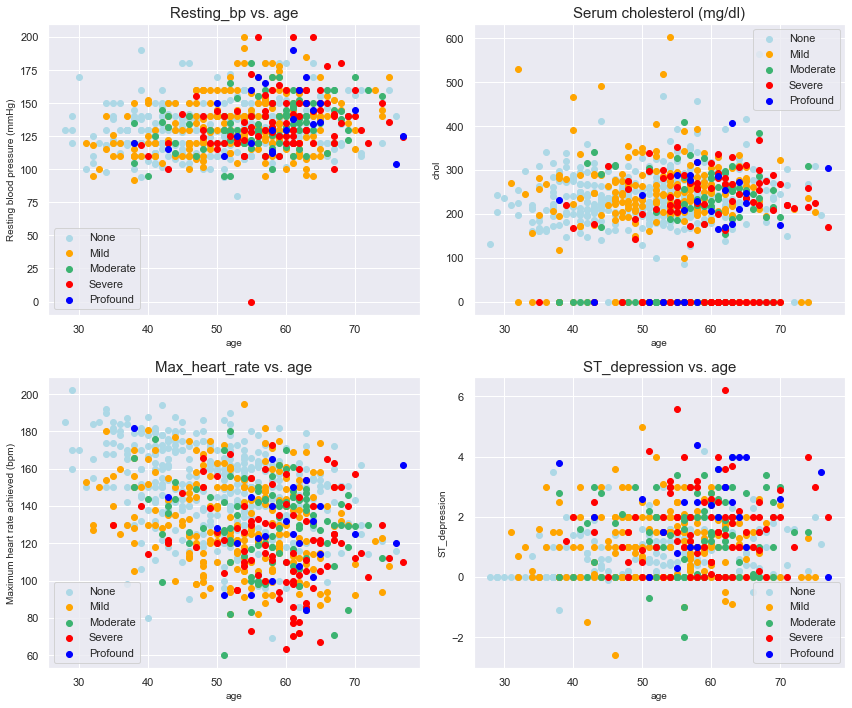

In [32]:
def numeric_features_vs_age(data): 
    """
    Scatter graph on the ffects of features for heart disease by age. 
    (Resting blood pressure, Serum Cholesterol, Maximum heart rate achieved, ST depression)
    """
    none = data['class']==0
    mild = data['class']==1
    mod = data['class']==2
    sev = data['class']==3
    pro = data['class']==4
    
    age_none = data.Age[none]
    age_mild = data.Age[mild]
    age_mod = data.Age[mod]
    age_sev = data.Age[sev]
    age_pro = data.Age[pro]
    
    None_color = 'LightBlue'
    Mild_color = 'Orange'
    Mod_color = 'MediumSeaGreen'
    Sev_color = 'Red'
    Pro_color = 'Blue'
    
    fig = plt.figure(figsize=(12, 10))
    
    # Resting blood pressure (mmHg) 
    plt.subplot(2, 2, 1)
    plt.scatter(x=age_none, y=data['Resting blood pressure'][none], color=None_color)
    plt.scatter(x=age_mild, y=data['Resting blood pressure'][mild], color=Mild_color)
    plt.scatter(x=age_mod, y=data['Resting blood pressure'][mod], color=Mod_color)
    plt.scatter(x=age_sev, y=data['Resting blood pressure'][sev], color=Sev_color)
    plt.scatter(x=age_pro, y=data['Resting blood pressure'][pro], color=Pro_color)
    plt.title('Resting_bp vs. age', fontsize=15)
    plt.legend(['None', 'Mild', 'Moderate', 'Severe', 'Profound'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('Resting blood pressure (mmHg)', fontsize=10)
        
        
    # Serum Cholesterol (mg/dl) 
    plt.subplot(2, 2, 2)
    plt.scatter(x=age_none, y=data['Serum cholesterol'][none], color=None_color)
    plt.scatter(x=age_mild, y=data['Serum cholesterol'][mild], color=Mild_color)
    plt.scatter(x=age_mod, y=data['Serum cholesterol'][mod], color=Mod_color)
    plt.scatter(x=age_sev, y=data['Serum cholesterol'][sev], color=Sev_color)
    plt.scatter(x=age_pro, y=data['Serum cholesterol'][pro], color=Pro_color)
    plt.title('Serum cholesterol (mg/dl)', fontsize=15)
    plt.legend(['None', 'Mild', 'Moderate', 'Severe', 'Profound'])
    plt.xlabel('age', fontsize=10)
    plt.ylabel('chol', fontsize=10)
 

    # Maximum heart rate achieved (bpm)
    plt.subplot(2, 2, 3)
    plt.scatter(x=age_none, y=data['Maximum heart rate'][none], color=None_color)
    plt.scatter(x=age_mild, y=data['Maximum heart rate'][mild], color=Mild_color)
    plt.scatter(x=age_mod, y=data['Maximum heart rate'][mod], color=Mod_color)
    plt.scatter(x=age_sev, y=data['Maximum heart rate'][sev], color=Sev_color)
    plt.scatter(x=age_pro, y=data['Maximum heart rate'][pro], color=Pro_color)
    plt.title('Max_heart_rate vs. age', fontsize=15)
    plt.legend(['None', 'Mild', 'Moderate', 'Severe', 'Profound'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)

    
    # ST_depression
    plt.subplot(2, 2, 4)
    plt.scatter(x=age_none, y=data['ST depression'][none], color=None_color)
    plt.scatter(x=age_mild, y=data['ST depression'][mild], color=Mild_color)
    plt.scatter(x=age_mod, y=data['ST depression'][mod], color=Mod_color)
    plt.scatter(x=age_sev, y=data['ST depression'][sev], color=Sev_color)
    plt.scatter(x=age_pro, y=data['ST depression'][pro], color=Pro_color)
    plt.title('ST_depression vs. age', fontsize=15)
    plt.legend(['None', 'Mild', 'Moderate', 'Severe', 'Profound'])
    plt.xlabel('age',fontsize=10)
    plt.ylabel('ST_depression', fontsize=10)   
            
    plt.tight_layout()
    plt.show()


numeric_features_vs_age(df);

### Feature vs. Feature for Condition (class)

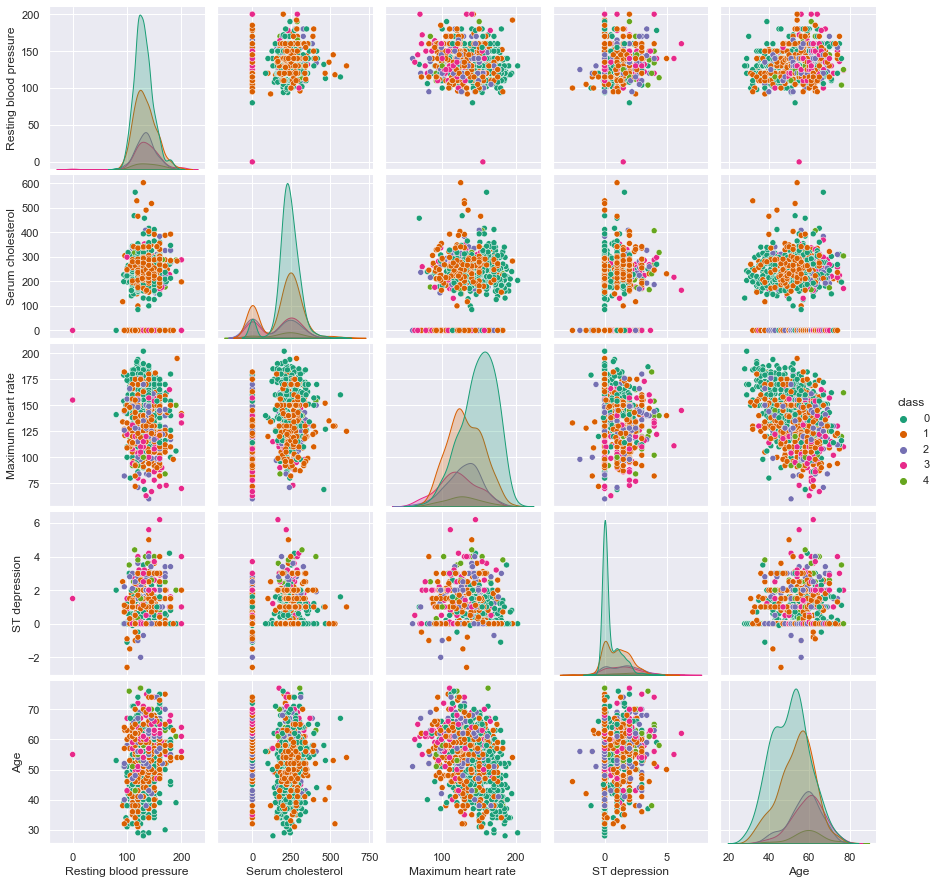

In [33]:
def plots(data):
    sns.pairplot(df[['Resting blood pressure','Serum cholesterol','Maximum heart rate','ST depression','Age', 'class']],
                 hue='class', palette='Dark2');
    
plots(df);

### Correlation Heatmap of features

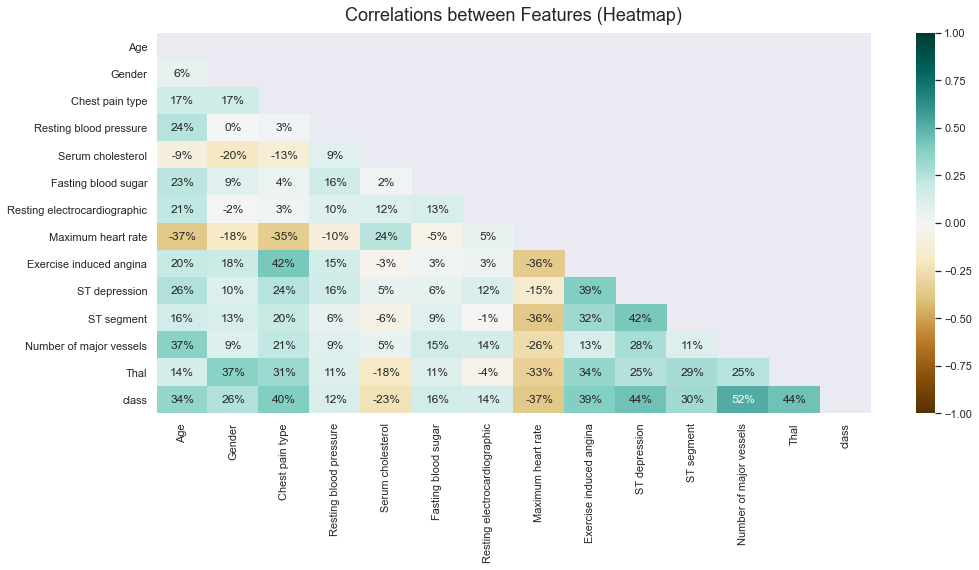

In [34]:
def correlation_heatmap(data):
    """
    Correlation Heat Map of the features.
    """
    plt.figure(figsize=(16, 7))
    matrix = np.triu(data.corr())
    
    heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, 
                          annot=True, cmap='BrBG', mask=matrix, fmt='.0%')
    heatmap.set_title('Correlations between Features (Heatmap)', fontdict={'fontsize':18}, pad=12)
    plt.show()
    
correlation_heatmap(df);

#### Observations
Top 3 correlated variables for Condition (class) are the following:

Number of major vessels : 0.52 

ST depression: 0.44

Thal : 0.44

Exercise induced angina: 0.39

Age : 0.34